In [3]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore')

In [47]:
col_Headers = ["EventType","RegisterDate","StopID","Odometer","Longitude","Latitude", "TaskID","LineID","TripID","DatagramID","DatagramDate","DatagramTime","BusID"]
df = pd.read_csv('m_datagrams.csv',',',dtype={"EventType": str, "RegisterDate": str, "StopID": str,"Odometer": str,"Longitude": str,"Latitude": str, "TaskID": str,"LineID": str,"TripID": str,"DatagramID": str,"DatagramDate": str,"DatagramTime": str,"BusID": str},names = col_Headers)

## Analisis Exploratorio de Datos

Un análisis exploratorio de los datos verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

In [16]:
df.head()

,EventType,RegisterDate,StopID,Odometer,Longitude,Latitude,TaskID,LineID,TripID,DatagramID,DatagramDate,DatagramTime,BusID
0,19,2018-09-04,501051,1,-764871900,34451717,572,140,548,5661359158,2018-09-03,07:05:57,714
1,19,2018-09-04,502103,1063,-765463867,33977717,1023,217,882,5661362653,2018-09-03,07:07:19,311
2,7,2018-09-04,515152,24,-765076783,34191300,705,2471,43,5661362655,2018-09-03,07:07:19,796
3,19,2018-09-04,502650,788,-764913067,34220317,143,150,389,5661367800,2018-09-03,07:09:21,561
4,7,2018-09-04,515006,91,-765005167,34115933,705,2471,43,5661348896,2018-09-03,07:01:54,796


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242473 entries, 0 to 2242472
Data columns (total 13 columns):
EventType       object
RegisterDate    object
StopID          object
Odometer        object
Longitude       object
Latitude        object
TaskID          object
LineID          object
TripID          object
DatagramID      object
DatagramDate    object
DatagramTime    object
BusID           object
dtypes: object(13)
memory usage: 222.4+ MB


In [46]:
data_missing= df.isnull().sum()/len(df)*100
data_missing

EventType        0.000000
RegisterDate    31.830261
StopID           0.000000
Odometer         0.000000
Longitude        0.000000
Latitude         0.000000
TaskID           0.000000
LineID           0.000089
TripID           0.000089
DatagramID       0.000089
DatagramDate    32.079494
DatagramTime     0.000089
BusID           32.079494
dtype: float64

In [36]:
df.tail()

,EventType,RegisterDate,StopID,Odometer,Longitude,Latitude,TaskID,LineID,TripID,DatagramID,DatagramDate,DatagramTime,BusID
2242468,8,2018-06-29,502301,-1,-765284850,34415983,145,2104,165,5511316915,2018-06-28,15:44:47,30
2242469,5,2018-06-29,502551,597,-765102900,34897600,931,2274,491,5511337393,2018-06-28,15:54:22,69
2242470,8,2018-06-29,502551,597,-1,-1,931,2274,491,5511337432,2018-06-28,15:54:23,69
2242471,WARN:,The,method,class,org.apache.commons.logging.impl.SLF4JLogFactor...,was,invoked.,NaN,NaN,NaN,NaN,NaN,NaN
2242472,WARN:,Please,see,http://www.slf4j.org/codes.html#release,for,an,explanation.,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Values

Standard Type = NaN,"", "%WARN%"


Estos son los missing values reconocidos en el Dataset

#### Los -1 y los 0 son buses que van sin tarea, sin operación, son viajes de posicionamiento o de salida

In [19]:
print("Porcentajes de -1 por cada columna : ")
i=0
for a in df.columns:
  print(a,":",(df[a].values=='-1').sum()/len(df)*100,"%")
  i+=1

Porcentajes de -1 por cada columna : 
EventType : 0.0 %
RegisterDate : 0.0 %
StopID : 3.487667410042395 %
Odometer : 23.387394184902117 %
Longitude : 3.420464817190664 %
Latitude : 3.420464817190664 %
TaskID : 2.7919176730332986 %
LineID : 2.3678768930551226 %
TripID : 2.8771806840037764 %
DatagramID : 0.0 %
DatagramDate : 0.0 %
DatagramTime : 0.0 %
BusID : 0.0 %


In [20]:
df.describe(include="all")

,EventType,RegisterDate,StopID,Odometer,Longitude,Latitude,TaskID,LineID,TripID,DatagramID,DatagramDate,DatagramTime,BusID
count,2242473,1528688,2242473,2242473,2242473,2242473,2242473,2242471,2242471,2242471,1523099,2242471,1523099
unique,33,245,2122,12573,65755,108932,4306,111,2798,2242471,242,76801,853
top,7,2019-03-30,-1,-1,-1,-1,-1,2273,-1,5818280253,2019-03-14,147,147
freq,320439,11502,78210,524456,76703,76703,62608,101770,64520,1,12400,17579,35214


In [21]:
df2= df[(df['EventType']=='12') | (df['EventType']=='23')]
df2.head()

,EventType,RegisterDate,StopID,Odometer,Longitude,Latitude,TaskID,LineID,TripID,DatagramID,DatagramDate,DatagramTime,BusID
7,23,2018-09-04,500106,63,-765076683,34882767,1005,421,577,5661355791,2018-09-03,07:04:39,883
12,23,2018-09-04,502601,-1,-764863567,34130200,161,150,45,5661347319,2018-09-03,07:01:17,571
14,23,2018-09-04,513038,40,-765037383,34749833,579,3372,285,5661355907,2018-09-03,07:04:41,156
66,23,2018-09-07,515048,163,-765000800,34115600,2698,2473,99999,5667035023,2018-09-06,07:39:55,158
76,23,2018-09-05,511274,38,-765228500,33838717,76,2211,343,5664051200,2018-09-04,08:32:15,156


In [22]:
temp= df2.BusID.value_counts().to_frame()
BusIDCounts= temp.reset_index()
BusIDCounts.columns=['BusID','Counts']
BusIDCounts.head()

,BusID,Counts
0,255,8703
1,640,6191
2,571,5869
3,153,4631
4,638,4046


In [23]:
plt.rc('figure',figsize=(15,8))

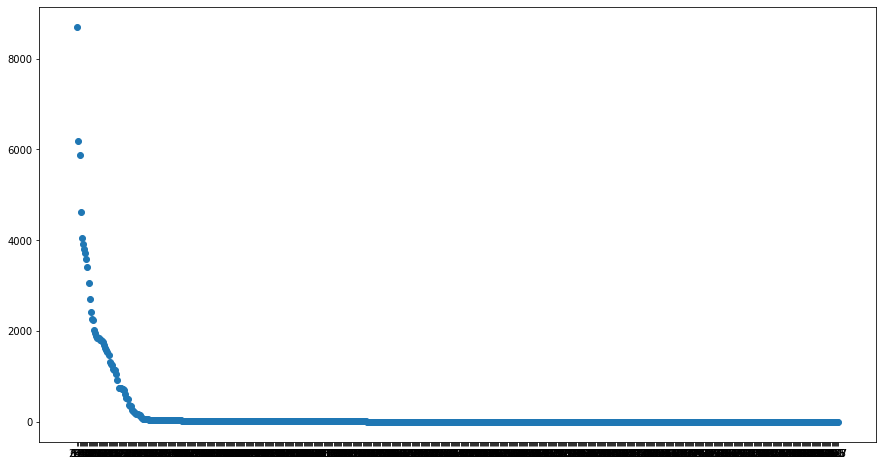

In [25]:
x = BusIDCounts['BusID']
y = BusIDCounts['Counts']

fig, ax = plt.subplots()
ax.scatter(x,y)
plt.show()

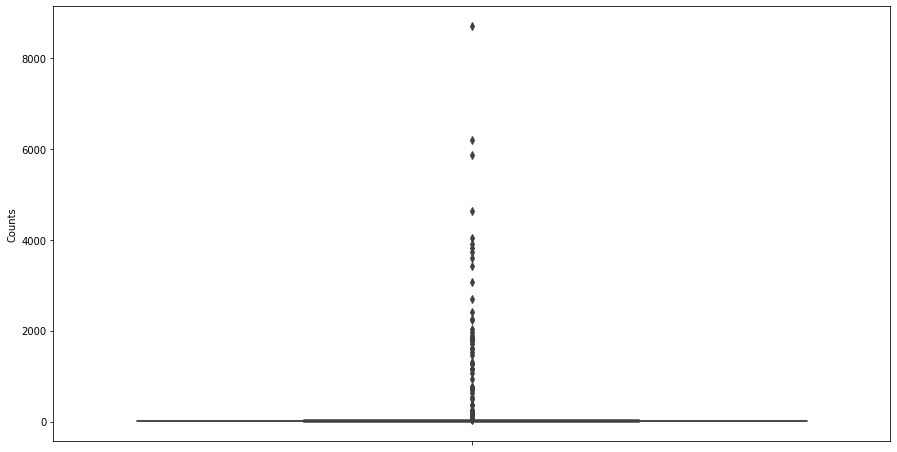

In [26]:
sns.boxplot(y=BusIDCounts['Counts'])

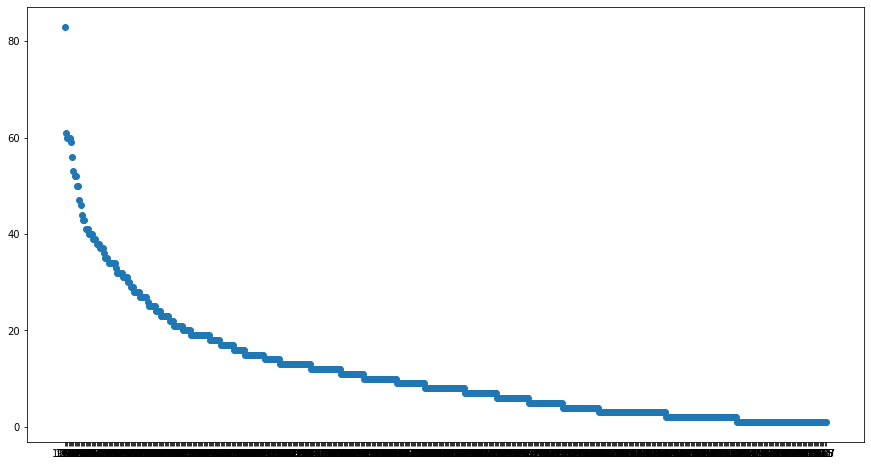

In [35]:
BusIDCounts2 = BusIDCounts[BusIDCounts['Counts'] < 100]
x2 = BusIDCounts2['BusID']
y2 = BusIDCounts2['Counts']
fig,ax2 = plt.subplots()
ax2.scatter(x2,y2)
plt.show()


In [53]:
df.dropna()

,EventType,RegisterDate,StopID,Odometer,Longitude,Latitude,TaskID,LineID,TripID,DatagramID,DatagramDate,DatagramTime,BusID
0,19,2018-09-04,501051,1,-764871900,34451717,572,140,548,5661359158,2018-09-03,07:05:57,714
1,19,2018-09-04,502103,1063,-765463867,33977717,1023,217,882,5661362653,2018-09-03,07:07:19,311
2,7,2018-09-04,515152,24,-765076783,34191300,705,2471,43,5661362655,2018-09-03,07:07:19,796
3,19,2018-09-04,502650,788,-764913067,34220317,143,150,389,5661367800,2018-09-03,07:09:21,561
4,7,2018-09-04,515006,91,-765005167,34115933,705,2471,43,5661348896,2018-09-03,07:01:54,796
5,9,2018-09-04,511275,46,-765243250,33849467,620,2212,430,5661348975,2018-09-03,07:01:56,854
6,17,2018-09-04,502311,-1,-765282517,33667167,404,3131,38,5661354073,2018-09-03,07:03:57,73
7,23,2018-09-04,500106,63,-765076683,34882767,1005,421,577,5661355791,2018-09-03,07:04:39,883
8,19,2018-09-04,501051,1,-764871933,34451683,572,140,548,5661359316,2018-09-03,07:06:01,714
9,7,2018-09-04,515152,24,-765076783,34191300,705,2471,43,5661362745,2018-09-03,07:07:21,796


In [54]:
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [EventType, RegisterDate, StopID, Odometer, Longitude, Latitude, TaskID, LineID, TripID, DatagramID, DatagramDate, DatagramTime, BusID]
Index: []
